In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

2024-11-08 21:19:29.011608: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 21:19:29.023266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731080969.036282     744 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731080969.040018     744 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 21:19:29.053331: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
img_height,img_width=224,224
batch_size=8
directory = '/home/axernox/Resnet50/tbx11k-simplified_can/traincan'
train = keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 2065 files belonging to 3 classes.


I0000 00:00:1731068105.463244     741 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [7]:
directoryval = '/home/axernox/Resnet50/tbx11k-simplified_can/valcan'
val = keras.utils.image_dataset_from_directory(
    directoryval,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 800 files belonging to 3 classes.


In [8]:
directorytest = '/home/axernox/Resnet50/tbx11k-simplified_can/testcan'
test = keras.utils.image_dataset_from_directory(
    directorytest,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 291 files belonging to 3 classes.


In [9]:
pt_m = keras.applications.VGG19(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(img_height,img_width,3),
    pooling=None,
    classes=3,
    classifier_activation="softmax",
    name="vgg19",
)
#x = pt_m.output
x = GlobalAveragePooling2D()(pt_m.output)
x = Dense(512, activation='relu')(x)
output = Dense(3, activation='softmax')(x)      

vgg19_model = Model(inputs=pt_m.input, outputs=output)

In [ ]:
vgg19_model.summary();

In [10]:
vgg19_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
historyvgg = vgg19_model.fit(
  train,
  validation_data=val,
  epochs=50,
  batch_size=8,
  callbacks=[early_stopping]
)

Epoch 1/50


I0000 00:00:1731068121.716697     989 service.cc:148] XLA service 0x564221784ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731068121.717060     989 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-11-08 17:45:21.797683: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731068122.221955     989 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1731068137.856497     989 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


259/259 ━━━━━━━━━━━━━━━━━━━━ 82s 244ms/step - accuracy: 0.3554 - loss: 1.0997 - val_accuracy: 0.4013 - val_loss: 1.0849
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 55s 214ms/step - accuracy: 0.3543 - loss: 1.0914 - val_accuracy: 0.4013 - val_loss: 1.1030
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 55s 214ms/step - accuracy: 0.3854 - loss: 1.0853 - val_accuracy: 0.6475 - val_loss: 0.8753
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 56s 215ms/step - accuracy: 0.5913 - loss: 0.9177 - val_accuracy: 0.6662 - val_loss: 0.7987
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 56s 216ms/step - accuracy: 0.7455 - loss: 0.6662 - val_accuracy: 0.8025 - val_loss: 0.5717
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 55s 214ms/step - accuracy: 0.8137 - loss: 0.5031 - val_accuracy: 0.8188 - val_loss: 0.5274
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.8538 - loss: 0.4162 - val_accuracy: 0.8150 - val_loss: 0.5045
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.8664 - loss: 0.3592 - val

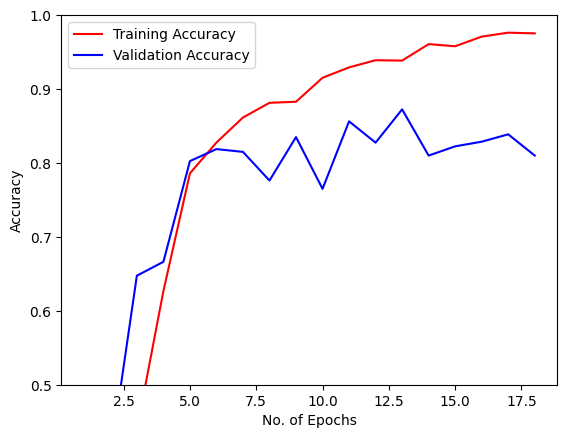

In [ ]:
epochs = [i for i in range(0,19)]
plt.plot(epochs,historyvgg.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,historyvgg.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0.5,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
classname = val.class_names

In [14]:
pred = vgg19_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step


2024-11-08 18:04:50.003965: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=classname))

              precision    recall  f1-score   support

     healthy       0.96      0.97      0.97       107
  sick_no_tb       0.90      0.92      0.91       107
          tb       0.84      0.81      0.82        77

    accuracy                           0.91       291
   macro avg       0.90      0.90      0.90       291
weighted avg       0.91      0.91      0.91       291



<Axes: >

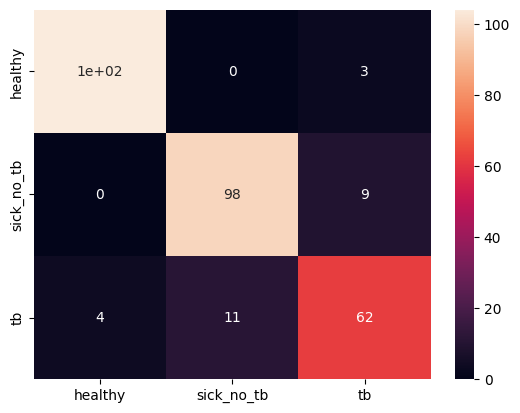

In [16]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=classname, yticklabels=classname)

In [4]:
vgg19_model.save('vgg19_canny_1.keras')

NameError: name 'vgg19_model' is not defined

In [70]:
import json
with open("vgg19_canny_1.json", "w") as f:
    json.dump(historyvgg.history, f)

In [2]:
import shap
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

In [3]:
vgg19_model = load_model('/home/axernox/Resnet50/vgg19_canny_1.keras')

I0000 00:00:1731080986.335767     744 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
class_names = ['healthy', 'sick_no_tb', 'tb']

In [5]:
img1 = image.load_img('/home/axernox/Resnet50/tbx11k-simplified_can/valcan/tb/tb0014.png', target_size=(224, 224))
img_array1 = image.img_to_array(img1)
#img_array = np.expand_dims(img_array, axis=0)
#img_array1 = preprocess_input(img_array1)
print(img_array1.shape)

(224, 224, 3)


In [6]:
X1 = np.array([img_array1])
X1.shape

(1, 224, 224, 3)

In [7]:
pred = vgg19_model.predict(X1)
pred_label = class_names[np.argmax(np.round(pred,2))]
print(pred)
print(pred_label)

I0000 00:00:1731080998.796335    6746 service.cc:148] XLA service 0x7f8588004690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731080998.796657    6746 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-11-08 21:19:58.817201: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731080998.893035    6746 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.6531112e-12 7.3751376e-05 9.9992621e-01]]
tb


I0000 00:00:1731081000.548512    6746 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [8]:
masker = shap.maskers.Image("inpaint_telea", img_array1.shape)
def f1(X):
    tmp = X.copy()
    return vgg19_model(tmp)
explainer = shap.Explainer(f1, masker, output_names=class_names)

In [9]:
shap_values = explainer(X1[0:1], max_evals=500, batch_size=8, outputs=shap.Explanation.argsort.flip[:1])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:21, 21.58s/it]               


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


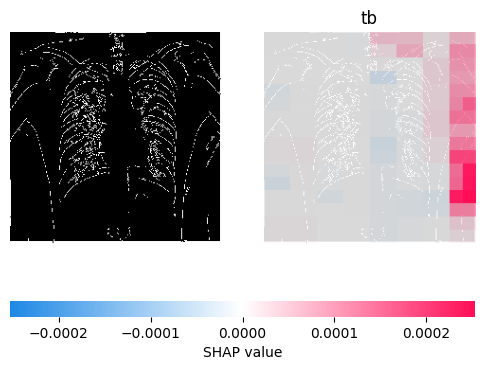

In [10]:
shap.image_plot(shap_values)